
I will be using the seed as 24 to generate the random numbers. 

In [97]:
seed_value = 24 #decided based on the sum of digits in enrollment number as discussed above

In [113]:
#generating the bandit instances and identifying the best arm
import numpy as np
np.random.seed(24) # seed is decided as above
bandit_means = np.random.uniform(0,1,10)#generating the bandit instance
best_arm = np.argmax(bandit_means) #the best arm
bandit_mean_optimal_arm = np.max(bandit_means) # the mean reward for the optimal arm
number_of_arms=bandit_means.shape[0]#Total number of bandits
print()
print('─' * 35)  
print('  Bandit environment is as follows  ')
print('─' * 35)  
print()
print()
print('bandit instance: ', bandit_means)
print('Mean reward for the optimal arm : ', bandit_mean_optimal_arm)
print('Best Arm: ', best_arm)
print('number of Arms: ', number_of_arms)
print('Average Reward: ', np.average(bandit_means))


───────────────────────────────────
  Bandit environment is as follows  
───────────────────────────────────


bandit instance:  [0.9600173  0.69951205 0.99986729 0.2200673  0.36105635 0.73984099
 0.99645573 0.31634698 0.13654458 0.38398001]
Mean reward for the optimal arm :  0.9998672926238792
Best Arm:  2
number of Arms:  10
Average Reward:  0.5813688582720551


The above information will not be known to the algorithms. The environment will be generated using the above information. $\epsilon$ is given as 0.1 and the total time horizon is T=10000.

In [106]:
#the following information will be known to the algorithm
epsilon = 0.1
T = 10000
number_of_arms=bandit_means.shape[0]

Initialize the environment

In [107]:
def bandit_environment(pulled_bandit):
  p = bandit_means[pulled_bandit]
  p_dummy =  np.random.uniform(0.0, 1.0)
  reward = 1 if p_dummy < p else 0
  return reward

#reward = bandit_environment(3)
#print(reward)
#printing rewards for all the bandits
# for i in range(number_of_arms):
#   unif_reward = bandit_environment(i)
#   print(unif_reward)

# Implementation of  $\epsilon$G1 algorithm

In [108]:
import random
def eG1(number_of_arms, epsilon, T):
  time_epoch=0 #the current time epoch
  reward = np.zeros(T)
  arm_count = np.zeros(number_of_arms) #Array to store the number of times 
  arm_reward = np.zeros(number_of_arms)
  arm_mean = np.zeros(number_of_arms)
  #Exploration Phase
  while time_epoch < epsilon*T:
    #Select arm randomly
    i = random.randint(0,number_of_arms-1)
    pulled_bandit_reward = bandit_environment(pulled_bandit = i)# bandit environment generated the reward
    #   print(pulled_bandit_reward)
    reward[time_epoch] = pulled_bandit_reward
    arm_reward[i]+=pulled_bandit_reward
    arm_count[i]+=1
    arm_mean[i]=arm_reward[i]/arm_count[i]
    time_epoch+=1
  #select the best arm
  best_arm=np.argmax(arm_mean)
  #print('best arm', best_arm)
  #Exploitation Phase
  while time_epoch<T:
    pulled_bandit_reward = bandit_environment(pulled_bandit = best_arm)# bandit environment generated the reward
    reward[time_epoch] = pulled_bandit_reward
    arm_reward[best_arm]+=pulled_bandit_reward
    arm_count[best_arm]+=1
    arm_mean[best_arm]=arm_reward[best_arm]/arm_count[best_arm]
    time_epoch+=1
  return reward

#print(number_of_arms)
#print(epsilon)
#print(T)

  

reward = eG1(number_of_arms, epsilon, T)
print(reward)

[1. 1. 1. ... 1. 1. 1.]


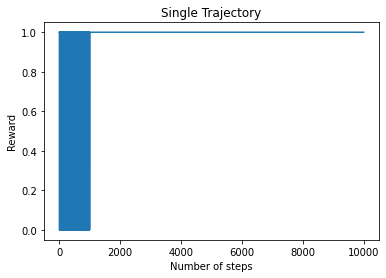

In [118]:
#Printing the graph for single trajectory
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = range(T)
# corresponding y axis values
y = reward

# plotting the points
plt.plot(x, y)

# naming the x axis
plt.xlabel('Number of steps')
# naming the y axis
plt.ylabel('Reward')

# giving a title to my graph
plt.title('Single Trajectory')

# function to show the plot
plt.show()


In [122]:
number_of_samples = 10000
expected_reward = np.zeros(T)
for experiments in range(number_of_samples):
  r = eG1(number_of_arms, epsilon, T)
 # print(r)  
  for j in range(T):
    expected_reward[j]+= r[j] 
 # print(expected_reward)  

expected_reward = expected_reward/number_of_samples


print(expected_reward)

[0.5856 0.5793 0.5774 ... 0.9989 0.9992 0.9996]


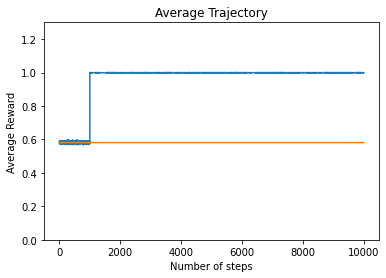

In [124]:

#Printing the graph for average trajectory
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = range(T)
# corresponding y axis values
y = expected_reward
y1 = np.ones(T)*np.average(bandit_means)
# plotting the points
plt.plot(x, y)
plt.plot(x, y1)

ax = plt.gca()
#ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 1.3])
# naming the x axis
plt.xlabel('Number of steps')
# naming the y axis
plt.ylabel('Average Reward')

# giving a title to my graph
plt.title('Average Trajectory')

# function to show the plot
plt.show()

